
# Project: Investigation of  FBI-gun_data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>most of the description come from NICS_Firearm_Checks_-_Month_Year_by_State_Type.pdf and is and attached file which was part materials for this project

> This project has two data sets; NICS data which is the main data set and a supplementary us census data set.  The NICS data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. It is important to note that the data represents the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. 

>Each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other. The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows: 

>• Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.

>• Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.

>• Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers. 
The indication of “multiple” denotes a background check where more than one type of firearm is associated to a single background check and “admin” denotes the administrative checks that are for other authorized uses of the NICS. Other types of transactions are explained below:

>• Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

>• Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop. 

>• Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited. 

>• Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

>• Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

>• Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL. 

>• The other columns are self-explanatory; the month records the month and year, the state records the state and the columns like Pre-pawn handguns are simply pre-pawn checks whose firearm is a handgun same for the rest of the columns. 

>• The census data contains estimate population for 2016 and 2010 for all the states and other information such as race percentage, sex percentages, minor percentages and lot more. All this are under the fact column and the rest of the columns are the states.
 


### Question(s) for Analysis
<ol>
    <li>	Which state tops the nics record?</li>
    <li>	Which Gun_type is most checked? When and where was background check highest?</li>
    <li>	Are types of Guns associated with types of transactions</li>
    <li>	Assuming each background check is equal to a gun purchanced,What is the distribution of the number of guns per thousand of a population change from 2010 to 2016?</li>
</ol>


In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_gun = pd.read_csv("E:/project_one/gun_data.csv")
df_census = pd.read_csv("E:/project_one/census_data.csv")

<a id='wrangling'></a>
## Data Wrangling and Cleaning


>viewed the first few lines of the df_gun data set and discovered that the so called month column has information for both year
so the column was renamed to date instead

In [348]:
#rename column 
df_gun.rename(columns = {'month':'date'}, inplace = True)


>None of the questions for analyis requires permit and permit_recheck so they'll be dropped

In [349]:
#dropping permit and permit_recheck
df_gun.drop(['permit', 'permit_recheck'], axis=1, inplace=True)



>I checked for null values and found that, they are quite a number of them and so deleting rows with null values wasn't an option. I decided to fill all null values with zero because, the data set contains counts of occurances, so if empty it is safe to say that count is zero. That's the assumption here

In [350]:
#filling all null values with 0
df_gun.fillna(0, inplace=True)


>**cleaning for first question**

>The variable country_data is created to hold the state and the sum of totals per country in order that the the details about the maximum sum of totals can be gotten

In [351]:
#calculate the total sum background checks per state and assigns to country data
country_data=df_gun.groupby('state', sort=False)["totals"].sum().reset_index(name ='Sum_of_Totals_per_state')

>**cleaning for second quesion**

>Question two requires information about handgun, long_gun, other and multiple. The rest of the colons are not needed and so dropped.

>since the question requires the total for each, the sum is calculated so we have a riflfles_check data set wich will have two columns, 'firearm' and 'sum_of_firearm_background_check' from here we can the the most checked firearm

In [352]:
#the index's from handgun to multiple is used to eleminate the rest of the data reason for the 2 and 6
riffles_check=df_gun.iloc[:, 2:6].sum().reset_index(name ='sum_of_firearm_background_check')
#renamming the index properly
riffles_check.rename(columns = {'index':'firearm'}, inplace = True)


>**cleaning for third question**

>This question only requires transaction data that is data that has any of the following; prepawn, redemption, returns, rentals, private sales and return to seller. the rest of the coloumns are droped

In [353]:
#removing unnessary colons for the gun calculations
new_df = df_gun.drop(df_gun.iloc[:, 0:7], axis = 1)
#the next line drops the last column 
new_df.drop(['totals'], inplace=True, axis=1)
#saving to transaction data
transaction_data = new_df.sum().reset_index(name='background_check')
transaction_data.rename(columns = {'index':'firearm_transaction'}, inplace = True)


>**cleaning for the fourth question**

>Here, we make use of the census data set too 
For the guns data,only the date, state and totals are needed

>the data is further grouped into year's and only 2010's and 2016's data is collected
the data for the two years will be kept  in two new data frames grouped by state 
and sumed so that it will contain the different state and the sum of totals

In [354]:
#Dropping unnecessary columns
df_gun.drop(df_gun.iloc[:, 2:24], axis = 1, inplace=True)


>Most of the analysis won't make use of the month in the date and so while the year will be extracted from date to replace that colum, i'll preserve the data with the month in another dataframe which will be used for future visualisation 

In [355]:
#dropping the date
df_gun2 = df_gun.drop(["date"], axis = 1)

>The date's column is of string data type and has extra characters on it so the integer value has to be extracted from it. 

In [356]:
#get the years from the dates 
df_gun2['Year']=df_gun['date'].str.extract('(\d+)').astype(int)

In [357]:
#selecting data for 2010 and 2016
df_gun_2010 = df_gun2[df_gun2['Year']==2010][["state", "totals"]]
df_gun_2016 = df_gun2[df_gun2['Year']==2016][["state", "totals"]]


In [358]:
#grouping the data by state and summing int's totals 
df_gun_2010v2 = df_gun_2010.groupby('state', as_index = False).sum()
df_gun_2016v2 = df_gun_2016.groupby('state', as_index = False).sum()

>For the census data, only the 2016 and 2010 estimated population data is used.
The Fact Note column too is not neccessary for our analysis so it will be dropped 

>*the census data was only a supplementary material reason why very little is used from there*

In [359]:
#dropping the fact note
df_census.drop(['Fact Note'], axis=1, inplace=True)


In [360]:
#preserving only estimate population data for 2010 and 2016
df_census.drop(df_census.index[2:85], inplace=True)




>A merge of the census data and the gun_dat requires that they somewhat have the same shape. 
The census data is transposed to achieve this 

In [361]:
#rearranging the shape of the data to resemble that of gun data
rearranged_df = df_census.transpose()

In [362]:
#naming the columns
rearranged_df.columns = ['2016_population', '2010_population']

In [363]:
#removing the first row since it is redundant: the title heads already have that information
rearranged_df.drop(rearranged_df.index[0], inplace=True)


In [364]:
#renaming index
rearranged_df['state'] = rearranged_df.index

>This data set contains the population estimates for each state for both 2010 and 2016

In [365]:
#seperating 2010's data from 2016's so as to merge with the background checks
df_census_2010 = rearranged_df[['state', '2010_population']]
df_census_2016 = rearranged_df[['state', '2016_population']]


>Initially, we created df_gun_2010v2 and df_gun_2016v2 which holds each state's total gun check for the respective years.<br> 
Now we have df_census_2010 and df_census_2016 that contains the population estimate for each state for the respective years.<br>
2010's data just as 2016's data are merged on the state column. <br> This will produce merged_2010 and merged_2016


In [366]:
#merging to get final data sets for the years ie df_gun_2010v2 with df_cencus_2010 and df_gun_2016v2 with df_cencus_2016
merged_2010 = pd.merge(df_census_2010, df_gun_2010v2, on='state')
merged_2016 = pd.merge(df_census_2016, df_gun_2016v2, on='state')


In [367]:
#renaming the column heads
merged_2010.columns = ['state', 'population', 'total_checks']
merged_2016.columns = ['state', 'population', 'total_checks']

>The datatype for the population column is string and contains comma's. Since arithmetic operations need to be done, it is changed to a inteer to have the same data type as total_checks


In [368]:
#remove comma's from population's in order to change the data type to float
merged_2010['population'] = merged_2010['population'].apply(lambda x: int(x.split()[0].replace(',', '')))
merged_2016['population'] = merged_2016['population'].apply(lambda x: int(x.split()[0].replace(',', '')))


>The number of guns per tousandth of a population(GPTOP) is  used to mean the number of people that have guns in a population of one thousand. This is all based on the assumption that a background check is equivalent to a bought riffle.<br>
*it is calculated as total checks multiplied by a thousand divided by the population*

In [369]:
#calculating the number of guns per thousands population 
merged_2010['GPTOP'] = (merged_2010['total_checks']*1000/merged_2010['population']).round(0)
merged_2016['GPTOP'] = (merged_2016['total_checks']*1000/merged_2016['population']).round(0)

>This question requires the change in the GPTOP. And so a new data frame is created to hold that change 

In [370]:
#calculating GPTOP change
GPTOP_change = pd.DataFrame()
GPTOP_change['state'] = merged_2016['state']
GPTOP_change['GPTOP_change'] = merged_2016['GPTOP'] - merged_2010['GPTOP']


<a id='eda'></a>
## Exploratory Data Analysis



### 1)	Which state tops the nics record?

In [371]:
#sort from maximum sum of checks 
country_data.sort_values(by=['Sum_of_Totals_per_state'], inplace=True, ascending=False)


In [372]:
#get dat for max country check
country_data.head(5)

,state,Sum_of_Totals_per_state
18,Kentucky,29762434
46,Texas,19435186
4,California,19014063
14,Illinois,15471534
40,Pennsylvania,13133876


>The above table shows the top five states for the NICS record

In [373]:
#little info about country_data
country_data.describe()

,Sum_of_Totals_per_state
count,5.500000e+01
mean,4.902230e+06
std,5.606927e+06
min,4.620000e+02
25%,1.180779e+06
50%,3.576312e+06
75%,6.466768e+06
max,2.976243e+07


>From the above tale we can get general information about the distribution of checks on countries for the NICS data

### 2) Which Gun_type is most checked? When and where was background check highest?

In [374]:
riffles_check

,firearm,sum_of_firearm_background_check
0,handgun,74053083.0
1,long_gun,97370026.0
2,other,1982594.0
3,multiple,3353513.0


>The above table shows the sum of checks for the different types of firearms

Text(0.5, 1.0, 'Firearm distribution')

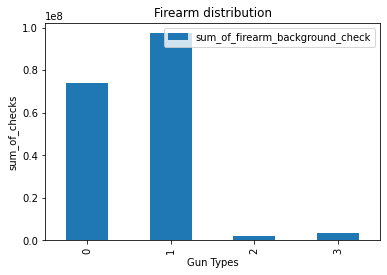

In [375]:
#ploting bar chart for firarm distribution
riffles_check.plot(kind='bar')
lables = ['handgun','long_gun', 'other', 'multiple']
plt.xlabel('Gun Types')
plt.ylabel('sum_of_checks')
plt.title("Firearm distribution")

In [376]:
#get the maximum for gun_data
df_gun.sort_values(by=['totals'], inplace=True, ascending=False)
df_gun.head(5)

,date,state,totals
2345,2014-03,North Carolina,541978
18,2017-09,Kentucky,398706
348,2017-03,Kentucky,397959
513,2016-12,Kentucky,397059
73,2017-08,Kentucky,394718


>The above has the top five records of background checks. It has the number of checks, the state and the month and the year. 

### 3)	Are types of Guns associated with types of transactions

>For this question a bar chart will be used to plot info about particular transaction in relation with thier associated gun types for the three gun types. This will produce a chart of 6 groups with three guntypes per group wich is nessessary for the comparison

In [377]:
#function that collects the value of background check from the transaction data
def trd(i):
    return transaction_data['background_check'][i]

In [378]:
trd(3)

4302048.0

In [379]:
#assigning transaction data values from transaction data set to be used for the graph
prepawn_handgun = trd(0)
prepawn_long_gun = trd(1)
prepawn_other = trd(2)

redemption_handgun = trd(3)
redemption_long_gun = trd(4)
redemption_other = trd(5)

returned_handgun = trd(6)
returned_long_gun = trd(7)
returned_other = trd(8)

rentals_handgun = trd(9)
rentals_long_gun = trd(10)

private_sale_handgun = trd(11)
private_sale_long_gun = trd(12)
private_sale_other = trd(13)

return_to_seller_handgun = trd(14)
return_to_seller_long_gun = trd(15)
return_to_seller_other = trd(16)

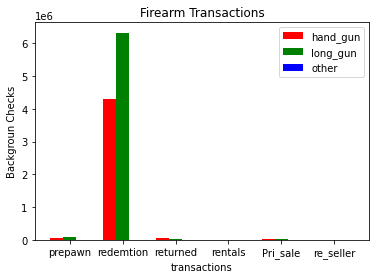

<Figure size 720x720 with 0 Axes>

In [380]:
#using the matplotlib to plot a bar chart for the comparison
N = 6
ind = np.arange(N) 
width = .25
  
handgun = [prepawn_handgun, redemption_handgun, returned_handgun, rentals_handgun, private_sale_handgun, return_to_seller_handgun]
bar1 = plt.bar(ind, handgun, width, color = 'r')
  
long_gun = [prepawn_long_gun, redemption_long_gun, returned_long_gun, rentals_long_gun, private_sale_long_gun, return_to_seller_long_gun]
bar2 = plt.bar(ind+width, long_gun, width, color='g')
  
other = [prepawn_other,redemption_other,returned_other,0, private_sale_other,return_to_seller_other]
bar3 = plt.bar(ind+width*2, other, width, color = 'b')
  
plt.xlabel("transactions")
plt.ylabel('Backgroun Checks')
plt.title("Firearm Transactions")
  
plt.xticks(ind+width,['prepawn', 'redemtion', 'returned', 'rentals', 'Pri_sale', 're_seller'])
plt.legend( (bar1, bar2, bar3), ('hand_gun', 'long_gun', 'other') )
plt.figure(figsize=(10,10))
plt.show()

>It is clear above that a certain transaction shadows the rest. so that transaction is dropped to view clearly the rest

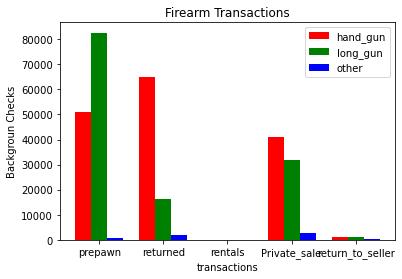

In [381]:
#ploting the same graph above but removing redemtion since redemption shadowed most of the other transactions
N = 5
ind = np.arange(N) 
width = .25
  
handgun = [prepawn_handgun, returned_handgun, rentals_handgun, private_sale_handgun, return_to_seller_handgun]
bar1 = plt.bar(ind, handgun, width, color = 'r')
  
long_gun = [prepawn_long_gun,  returned_long_gun, rentals_long_gun, private_sale_long_gun, return_to_seller_long_gun]
bar2 = plt.bar(ind+width, long_gun, width, color='g')
  
other = [prepawn_other,returned_other,0, private_sale_other,return_to_seller_other]
bar3 = plt.bar(ind+width*2, other, width, color = 'b')
  
plt.xlabel("transactions")
plt.ylabel('Backgroun Checks')
plt.title("Firearm Transactions")
  
plt.xticks(ind+width,['prepawn',  'returned', 'rentals', 'Private_sale', 'return_to_seller'])
plt.legend( (bar1, bar2, bar3), ('hand_gun', 'long_gun', 'other') )
plt.show()

>The above graph shows us the various gun_type associations to different transaction. From it we tell the relationship between particular transactions and gun types

### 4)	What is the distribution of the number of guns per thousand of a population change from 2010 to 2016?

In [382]:
#little info about the GPTOP data set
GPTOP_change.head() 

,state,GPTOP_change
0,Alabama,62.0
1,Alaska,25.0
2,Arizona,28.0
3,Arkansas,23.0
4,California,39.0


>The table above gives statistics about the GPTOP changes. 

Text(0, 0.5, 'GPTOP change')

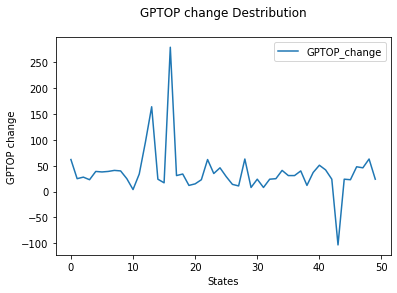

In [383]:
#plot a chart for its distribution
GPTOP_change.plot(kind='line')
plt.title("GPTOP change Destribution\n")
plt.xlabel("States")
plt.ylabel("GPTOP change")

>The above graph shows the distribution of GPTOP change for the various states.

In [384]:
#get the maximum GPTOP_change
GPTOP_change.sort_values(by=['GPTOP_change'], inplace=True, ascending=False)
GPTOP_change.head(1) 


,state,GPTOP_change
16,Kentucky,279.0


>the above shows the name and GPTOP change for the state with the highest GPTOP change 

In [393]:
GPTOP_change.tail(1) 

,state,GPTOP_change
43,Utah,-103.0


>the above shows the name and GPTOP change for the state with the least GPTOP change

In [385]:
#GPTOP_change describtion
GPTOP_change.describe() 


,GPTOP_change
count,50.000000
mean,37.520000
std,47.238967
min,-103.000000
25%,23.250000
50%,31.000000
75%,41.000000
max,279.000000


>From the above table we can see the maximum, minimm and value for GPTOP_change which are main focus.

In [391]:
#little info about the combined 2010 data set
merged_2010.head(5)

,state,population,total_checks,GPTOP
0,Alabama,4780131,308607,65.0
1,Alaska,710249,65909,93.0
2,Arizona,6392301,206050,32.0
3,Arkansas,2916025,191448,66.0
4,California,37254522,816399,22.0


>Five rows of the  combined 2010 data. This can be looked at together with that of 2016 which is the very next table below

In [392]:
#little info about the combined 2016 data set
merged_2016.head(5)

,state,population,total_checks,GPTOP
0,Alabama,4863300,616947,127.0
1,Alaska,741894,87647,118.0
2,Arizona,6931071,416279,60.0
3,Arkansas,2988248,266014,89.0
4,California,39250017,2377167,61.0


>combined 2016 data set


<a id='conclusions'></a>
## Conclusions

> **ANSWERS TO QUESTIONS**: <br>From the analysis, Kentucky top's the nics record with a total background check of *29,762,434*. No state was left null with regards to background checks and the minimum check was above *4.5 million*.

>Long guns are most checked and in March 2014, North Carolina recorded the highest number of checks ever recorded

>Redemptions are the most recorded transactions and for this transaction,even though long guns are mostly used, short guns are also significantly used. However, hand guns seems to be preferred for return transactions. Private sales and return to seller on another hand are transactinos associated more to hand guns even though long guns are significantly associated to the transactions. Standing alone, no riffle is used for rentals.

>From 2010 t0 2016, the number of guns in a thousand population per sate has a mean increase of 37.5 guns per thousandth population. While the populations all increase and the number of checks fluctuate(increase for some and decrease for others), the number of guns per thousand increases for most of the states. 
>No state record a constant GPTOP. Kentucky records the highest change of 279. Utah on the other hand recorded the strange drop in GPTOP of 103. 



> **lIMITATION**: This exploration does not make use of all the data given for this projects data set and focuses more on discovering peaks (minimums and maximums). It doesn't detailly explore relationships between variables and correllations.  

>THANKS

